#**Part_one: Data Wrangling**

##**Importing packages**
Python packages to cover data manipulation, visualization, and statistical analysis.

In [ ]:
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
#from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Data Loading**

Use Pandas to read CSV, Excel, or other file formats.

In [ ]:

#Load a CSV file
df_car = pd.read_csv('drive/MyDrive/project for school/Nov24_PythonDA_project_data.csv')


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Display the first few rows
df_car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


##**Understanding the Dataset**

**List of Columns in Dataframe**

In [ ]:
df_car.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

Handling Null Values

**Basic information**

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Summary of the dataset
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Summary statistics**

In [ ]:
# Statistical summary for numerical columns
df_car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**Missing values**

In [ ]:
# Check for missing values
df_car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


#**Project Tasks**

##**Task_1: Cleaning the Dataset**

Identify if there are missing values
Decide how to handle missing data for each column (e.g., fill with appropriate values, drop rows, etc.).

###**1.1 Handle Missing Data**

In [ ]:
#before
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
#check for missing data
missing_counts = df_car.isnull().sum()
missing_percent = df_car.isnull().mean() * 100 #finding the percentage and times 100

#combine into one table
missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percent})
print(missing_summary)


                   Missing Count  Missing Percentage
Make                           0            0.000000
Model                          0            0.000000
Year                           0            0.000000
Engine Fuel Type               3            0.025180
Engine HP                     69            0.579151
Engine Cylinders              30            0.251805
Transmission Type              0            0.000000
Driven_Wheels                  0            0.000000
Number of Doors                6            0.050361
Market Category             3742           31.408427
Vehicle Size                   0            0.000000
Vehicle Style                  0            0.000000
highway MPG                    0            0.000000
city mpg                       0            0.000000
Popularity                     0            0.000000
MSRP                           0            0.000000


insights


Columns with Missing Data
Market Category – categorical (31% missing)

Engine HP – numeric (0.58% missing)

Engine Cylinders – numeric (0.25% missing)

Number of Doors – numeric (0.05% missing)

Engine Fuel Type – categorical (0.03% missing)



Create a cleaned version — df_car_cleaned
Keeps the original df_car untouched

Safer for comparison or rollback

In [ ]:
# Create a copy for cleaning
df_car_cleaned = df_car.copy()

Clean the First Column — Market Category
➤ What is it?
This is a categorical column. Cars can have values like "Luxury", "Crossover", "Performance", etc.

➤ Strategy:
Too much missing data to impute accurately, but the column might be useful. So we’ll fill nulls with a placeholder like "Unknown".




In [ ]:
df_car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Fill missing 'Market Category' values with 'Unknown'
df_car_cleaned['Market Category'] = df_car_cleaned['Market Category'].fillna('Unknown')


In [ ]:
df_car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Clean Engine HP
➤ What is it?
Numeric (float), with ~0.58% missing

Represents engine horsepower

➤ Strategy:
Fill missing values with the median, to avoid outliers skewing the data

In [ ]:
df_car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
median_hp = df_car_cleaned['Engine HP'].median()
df_car_cleaned['Engine HP'] = df_car_cleaned['Engine HP'].fillna(median_hp)


In [ ]:
df_car_cleaned.head(40)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


Clean Engine Cylinders
➤ What is it?
Numeric (float), ~0.25% missing

Usually has a small set of values (like 4, 6, or 8)

➤ Strategy:
Fill with mode (most common value)



In [ ]:
df_car_cleaned['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [ ]:
mode_cylinders = df_car_cleaned['Engine Cylinders'].mode()[0]
df_car_cleaned['Engine Cylinders'] = df_car_cleaned['Engine Cylinders'].fillna(mode_cylinders)


In [ ]:
df_car_cleaned.iloc[1810]

,1810
Make,Volkswagen
Model,Beetle Convertible
Year,2014
Engine Fuel Type,premium unleaded (recommended)
Engine HP,210.0
Engine Cylinders,4.0
Transmission Type,AUTOMATED_MANUAL
Driven_Wheels,front wheel drive
Number of Doors,2.0
Market Category,Performance


Clean Number of Doors
➤ Strategy:
Also fill with mode, since cars mostly have 4 doors.


In [ ]:
mode_doors = df_car_cleaned['Number of Doors'].mode()[0]
df_car_cleaned['Number of Doors'] = df_car_cleaned['Number of Doors'].fillna(mode_doors)


Clean Engine Fuel Type
➤ Strategy:
Categorical, very little missing — fill with most common fuel type.



In [ ]:
mode_fuel = df_car_cleaned['Engine Fuel Type'].mode()[0]
df_car_cleaned['Engine Fuel Type'] = df_car_cleaned['Engine Fuel Type'].fillna(mode_fuel)


In [ ]:
df_car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Check if there are any missing values left
df_car_cleaned.isnull().sum()


,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [ ]:
df_car_cleaned

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
 df_car_cleaned.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df_car_cleaned.dtypes



,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


Column-by-Column Breakdown


Column	       Current Type	      Should Be        	   Notes

Make, Model    object             category(optional)   Strings → Convert to
                                                       category to optimize memory

Year           int64              int64                good


Engine Fuel    object             category(optional)   Fine for now; convert  
type                                                   to category if no
                                                       textprocessing needed

Engine HP        float64          loat64               good

Engine Cylinders float64.          int                 ❗Should be converted
                                                       (whole numbers only)


Transmission Type	object	       category (optional)	✔️ Fine; category  
                                                           saves memory and speeds up groupings


Driven_Wheels	    object	       category (optional)   ✔️Same as above


Number of Doors	  float64	        int	                 ❗ Convert to int if
                                                          values are clean

Market Category	   object	        category (optional)    ✔️ Fine
Vehicle Size	     object	        category (optional)	   ✔️ Fine
Vehicle Style	     object	        category (optional)	   ✔️ Fine
highway MPG	       int64	        int64	                 ✔️ Good
city mpg	         int64	        int64	                 ✔️ Good
Popularity	       int64	        int64	                 ✔️ Good
MSRP	             int64          int64                  ✔️ Good






 Why Convert Some float64 Columns to int?
Examples:

Engine Cylinders

Number of Doors

These are technically float64 right now, but:

In real life, cylinders and doors are whole numbers (you don't have 3.7 doors).

If they only contain whole numbers, they can be safely cast to int.

➡️ Why this matters:
Reduces memory, avoids confusion, and makes aggregations/filters behave more naturally.**bold text**

In [ ]:
'''Why Convert object Columns to category?
Examples:

Make, Model, Engine Fuel Type, Transmission Type, etc.

These are stored as object (Python strings), but they actually represent fixed categories (not unique values in every row).

➡️ Why use category type:

Faster filtering and grouping

Smaller memory usage

Helpful when building dashboards, dropdown filters, or encoding data later

You can check how many unique values there are:'''
df_car_cleaned['Make'].nunique()  # If it’s under 100, category is great!


48

In [ ]:
''' Why Convert Some float64 Columns to int?
Examples:

Engine Cylinders

Number of Doors

These are technically float64 right now, but:

In real life, cylinders and doors are whole numbers (you don't have 3.7 doors).

If they only contain whole numbers, they can be safely cast to int.

➡️ Why this matters:
Reduces memory, avoids confusion, and makes aggregations/filters behave more naturally.**bold text**'''

df_car_cleaned['Engine Cylinders'].unique()


array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

In [ ]:
df_car_cleaned['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', 'Unknown', 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance

###**1.2 Data Type Conversion**

Ensure that columns are of the correct data type for analysis (e.g., ensure that 'Year' is an integer or float)

In [ ]:
# Convert float to int for columns that should be whole numbers

df_car_cleaned['Number of Doors'] = df_car_cleaned['Number of Doors'].astype(int)
df_car_cleaned['Engine Cylinders'] = df_car_cleaned['Engine Cylinders'].astype(int)
df_car_cleaned['Engine HP'] = df_car_cleaned['Engine HP'].astype(int)

#Convert string/object columns to 'category' to save memory
'''category_cols = [
    'Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
    'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'
]
for col in category_cols:
    df_car_cleaned[col] = df_car_cleaned[col].astype('category')
'''
df_car_cleaned.dtypes


,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,int64
Engine Cylinders,int64
Transmission Type,object
Driven_Wheels,object
Number of Doors,int64
Market Category,object


###**1.3 Filtering Data**

Filter the dataset to only include cars from the year 1995 and later.


In [ ]:
#Filter rows by year
df_car_cleaned = df_car_cleaned[df_car_cleaned['Year'] >= 1995]
df_car_cleaned['Year'].min()  # Should now be 1995
df_car_cleaned[['Make', 'Model', 'Year']].sort_values('Year').head() #sample
df_car_cleaned.sort_values('Year')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4467,Ford,F-150 SVT Lightning,1995,regular unleaded,240,8,AUTOMATIC,rear wheel drive,2,Unknown,Large,Regular Cab Pickup,15,11,5657,4508
7584,Toyota,Pickup,1995,regular unleaded,116,4,MANUAL,four wheel drive,2,Unknown,Compact,Extended Cab Pickup,20,17,2031,2553
10847,Nissan,Truck,1995,regular unleaded,153,6,MANUAL,rear wheel drive,2,Unknown,Compact,Extended Cab Pickup,20,16,2009,2121
10848,Nissan,Truck,1995,regular unleaded,134,4,MANUAL,rear wheel drive,2,Unknown,Compact,Regular Cab Pickup,24,19,2009,2000
10849,Nissan,Truck,1995,regular unleaded,134,4,MANUAL,rear wheel drive,2,Unknown,Compact,Regular Cab Pickup,24,19,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,BMW,2 Series,2017,premium unleaded (recommended),335,6,AUTOMATIC,all wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,32,21,3916,51050
51,BMW,2 Series,2017,premium unleaded (recommended),335,6,AUTOMATIC,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,32,21,3916,49050
50,BMW,2 Series,2017,premium unleaded (recommended),335,6,AUTOMATIC,all wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,31,21,3916,46450
34,FIAT,124 Spider,2017,premium unleaded (recommended),160,4,MANUAL,rear wheel drive,2,Performance,Compact,Convertible,35,26,819,28195


###**1.4 String Operations**

Standardize text entries by converting these columns' entries to lowercase:
Vehicle Style
Market Category


In [ ]:
df_car_cleaned['Vehicle Style'] = df_car_cleaned['Vehicle Style'].str.lower()
df_car_cleaned['Market Category'] = df_car_cleaned['Market Category'].str.lower()

df_car_cleaned[['Vehicle Style', 'Market Category']].head()


<ipython-input-38-9bb54ba4425e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_cleaned['Vehicle Style'] = df_car_cleaned['Vehicle Style'].str.lower()
<ipython-input-38-9bb54ba4425e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_cleaned['Market Category'] = df_car_cleaned['Market Category'].str.lower()


,Vehicle Style,Market Category
0,coupe,"factory tuner,luxury,high-performance"
1,convertible,"luxury,performance"
2,coupe,"luxury,high-performance"
3,coupe,"luxury,performance"
4,convertible,luxury


##**Task_2: Feature Engineering**

###**2.1 Create New Columns**

In [ ]:
#Create a column called Total MPG that is the average of city mpg and highway MPG.
df_car_cleaned['Total MPG'] = (df_car_cleaned['city mpg'] + df_car_cleaned['highway MPG']) / 2
#Create a column called Price per HP calculated as: MSRP / Engine HP.
df_car_cleaned['Price per HP'] = (df_car_cleaned['MSRP']) / (df_car_cleaned['Engine HP'])
df_car_cleaned['Price per HP'] = df_car_cleaned['Price per HP'].replace([np.inf, -np.inf], np.nan)
df_car_cleaned['Price per HP'] = df_car_cleaned['Price per HP'].round(2)
print(df_car_cleaned[['Make', 'Model', 'Year', 'Total MPG', 'Price per HP']].head())

  Make       Model  Year  Total MPG  Price per HP
0  BMW  1 Series M  2011       22.5        137.72
1  BMW    1 Series  2011       23.5        135.50
2  BMW    1 Series  2011       24.0        121.17
3  BMW    1 Series  2011       23.0        128.04
4  BMW    1 Series  2011       23.0        150.00


<ipython-input-39-cd5f686e43ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_cleaned['Total MPG'] = (df_car_cleaned['city mpg'] + df_car_cleaned['highway MPG']) / 2
<ipython-input-39-cd5f686e43ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_cleaned['Price per HP'] = (df_car_cleaned['MSRP']) / (df_car_cleaned['Engine HP'])
<ipython-input-39-cd5f686e43ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

##**Task_3: Exploratory Analysis**


### **3.1 Descriptive Statistics:**






**Calculate summary statistics (mean, median, standard deviation) for the following columns:
 Engine HP, MSRP, Popularity, highway MPG, and city mpg**.


In [ ]:
numeric_columns = ['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']
summary_stats = df_car_cleaned[numeric_columns].describe(percentiles=[.25, .5, .75])
descriptive_stats = df_car_cleaned[numeric_columns].describe(percentiles=[.25, .5, .75])

additional_stats = pd.DataFrame({
    'median': df_car_cleaned[numeric_columns].median(),
    'mode': df_car_cleaned[numeric_columns].mode().iloc[0],
    'range': df_car_cleaned[numeric_columns].max() - df_car_cleaned[numeric_columns].min(),
    'IQR': df_car_cleaned[numeric_columns].quantile(0.75) - df_car_cleaned[numeric_columns].quantile(0.25),
    'skewness': df_car_cleaned[numeric_columns].skew(),
    'kurtosis': df_car_cleaned[numeric_columns].kurt()
}).transpose()

# Combine all statistics
full_stats = pd.concat([descriptive_stats, additional_stats])

# Print the summary statistics
print(full_stats.round(2))



          Engine HP        MSRP  Popularity  highway MPG  city mpg
count      11090.00    11090.00    11090.00     11090.00  11090.00
mean         256.53    43451.68     1569.38        26.87     19.90
std          108.45    61347.21     1453.98         9.02      9.22
min           55.00     2000.00        2.00        12.00      7.00
25%          177.00    23050.50      549.00        22.00     16.00
50%          240.00    31302.50     1385.00        26.00     18.00
75%          304.00    43503.75     2009.00        31.00     22.00
max         1001.00  2065902.00     5657.00       354.00    137.00
median       240.00    31302.50     1385.00        26.00     18.00
mode         200.00     2000.00     1385.00        24.00     17.00
range        946.00  2063902.00     5655.00       342.00    130.00
IQR          127.00    20453.25     1460.00         9.00      6.00
skewness       1.30       11.78        1.63         7.67      7.02
kurtosis       2.35      264.04        2.16       180.96     7

Now lets try to visualize the primary columns and see what we can understand,and applying two methods:

1.Log Transformation

Log transformation helps to compress the scale of variables like MSRP which has very high values. This will make it easier to compare across the board.

2.Normalization

Normalizing the data scales all the features to a 0-1 range. This will ensure that all variables have the same impact on the visualization.

<ipython-input-41-a4f04608a7fa>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.29598309 0.2589852  0.2589852  ... 0.2589852  0.2589852  0.17547569]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_car_cleaned.loc[:, columns_to_normalize] = scaler.fit_transform(df_car_cleaned[columns_to_normalize])
<ipython-input-41-a4f04608a7fa>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02138425 0.01872666 0.01664323 ... 0.02355732 0.02370268 0.01307959]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_car_cleaned.loc[:, columns_to_normalize] = scaler.fit_transform(df_car_cleaned[columns_to_normalize])
<ipython-input-41-a4f04608a7fa>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6921

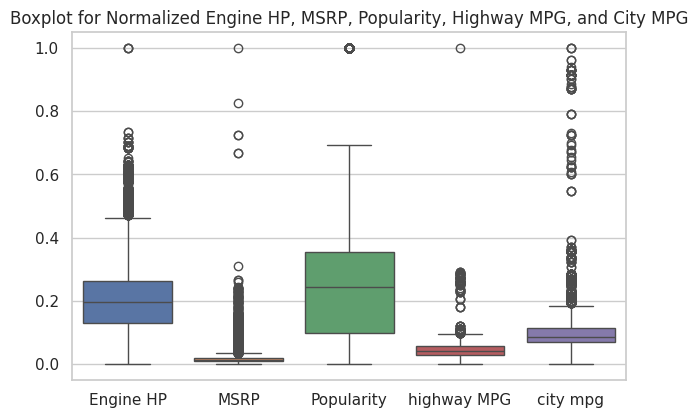

In [ ]:
# Remove rows where MSRP is 0 or negative before applying log transformation
df_car_cleaned_msrp = df_car_cleaned[df_car_cleaned['MSRP'] > 0].copy()  # Make sure you're working with a copy
# Apply log transformation to MSRP (add a small constant if necessary to avoid log(0))
df_car_cleaned_msrp['MSRP_log'] = np.log(df_car_cleaned_msrp['MSRP'] + 1).copy()
# Normalize the selected columns to a 0-1 scale
scaler = MinMaxScaler()
columns_to_normalize = ['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']
df_car_cleaned.loc[:, columns_to_normalize] = scaler.fit_transform(df_car_cleaned[columns_to_normalize])

# Set style for better readability
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(12, 8))

# 1. Boxplot for normalized data
plt.subplot(2, 2, 1)
sns.boxplot(data=df_car_cleaned[columns_to_normalize])
plt.title('Boxplot for Normalized Engine HP, MSRP, Popularity, Highway MPG, and City MPG')



# Show plots
plt.tight_layout()
plt.show()



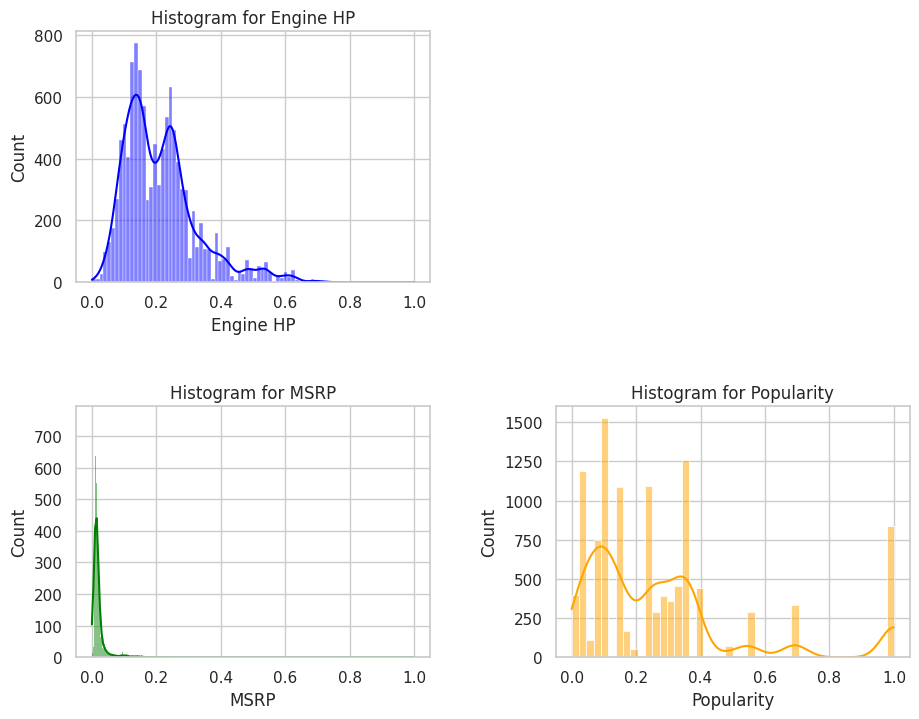

In [ ]:
plt.figure(figsize=(10, 8))  # Make the figure bigger

# 1. Histogram for Engine HP
plt.subplot(2, 2, 1)
sns.histplot(df_car_cleaned['Engine HP'], kde=True, color='blue')
plt.title('Histogram for Engine HP', fontsize=12)

# 2. Histogram for MSRP
plt.subplot(2, 2, 3)
sns.histplot(df_car_cleaned['MSRP'], kde=True, color='green')
plt.title('Histogram for MSRP', fontsize=12)

# 3. Histogram for Popularity
plt.subplot(2, 2, 4)
sns.histplot(df_car_cleaned['Popularity'], kde=True, color='orange')
plt.title('Histogram for Popularity', fontsize=12)

plt.tight_layout(pad=3.0)  # Adjust layout and spacing
plt.show()

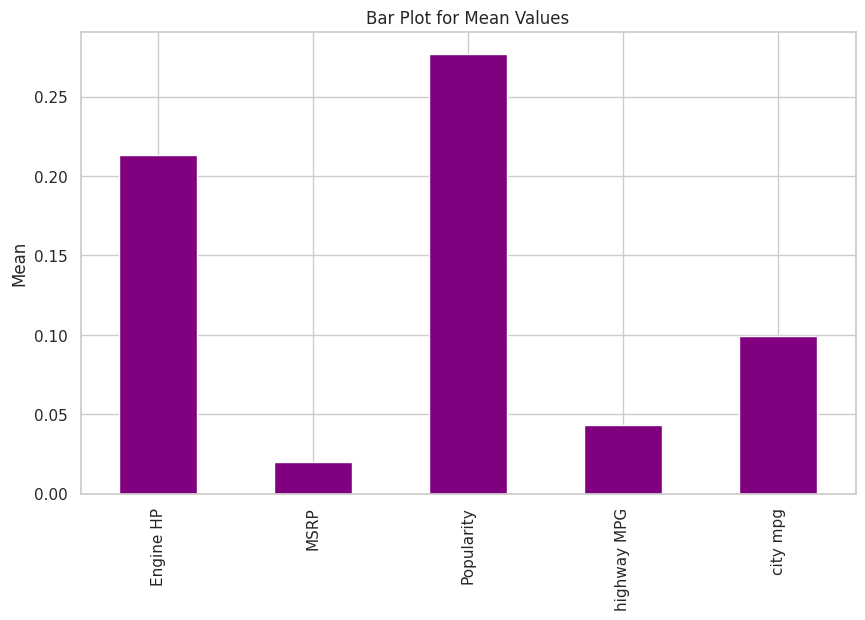

          Engine HP          MSRP    Popularity   highway MPG      city mpg
count  11090.000000  11090.000000  11090.000000  11090.000000  11090.000000
mean       0.213031      0.020084      0.277167      0.043469      0.099241
std        0.114636      0.029724      0.257115      0.026378      0.070946
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.128964      0.010199      0.096729      0.029240      0.069231
50%        0.195560      0.014198      0.244562      0.040936      0.084615
75%        0.263214      0.020109      0.354907      0.055556      0.115385
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [ ]:
# 5. Bar Plot for the mean of each column
mean_values = df_car_cleaned[['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']].mean()
mean_values.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Bar Plot for Mean Values')
plt.ylabel('Mean')
plt.show()
print(df_car_cleaned[columns_to_normalize].describe())

1. Boxplot for Normalized Engine HP, MSRP, Popularity, Highway MPG,
   and City MPG

Engine HP:

    The mean value is 0.207: This indicates that most vehicles have relatively low horsepower compared to the maximum value of 1.

    The 25th percentile (0.1219) shows that 25% of vehicles have very low engine power.

    The 50th percentile (0.1861) or median indicates that half of the vehicles have moderate horsepower.

    The 75th percentile (0.2556) suggests that 75% of vehicles have moderate to high horsepower.

    The maximum value is 1.0, indicating that some vehicles, such as sports or luxury cars, have very high engine horsepower.

  MSRP:

    The mean value of 0.0207 suggests that the majority of vehicles in this dataset are in the lower price range, close to the lower end (0).

    The minimum value is 0, indicating there are some vehicles with extremely low MSRP (possibly very old or basic models).

    The 25th percentile (0.0106) and 50th percentile (0.0144) values are both low, suggesting that most vehicles in this dataset are budget-friendly or more affordable.

    The maximum value of 1.0 indicates that a few vehicles are extremely expensive, likely luxury or rare cars.

  Popularity:

    The mean value of 0.2772 suggests that the average popularity of vehicles is somewhat low when compared to the maximum value (1).

    The minimum value of 0 means that there are some cars in the dataset with little to no popularity.

    The 25th percentile (0.0967) and 50th percentile (0.2446) suggest that most cars are moderately popular, while the 75th percentile (0.3549) shows that a quarter of the vehicles have very high popularity scores.

    The maximum value of 1.0 indicates that a few cars are extremely popular and well-known models.

 Highway MPG:

    The mean value of 0.0436 suggests that most vehicles have relatively low fuel efficiency on highways, with values clustering closer to 0.

    The maximum value of 1.0 indicates that there are some cars in the dataset that are very fuel-efficient on highways, likely hybrid or electric vehicles.

    The 25th percentile (0.0292) suggests that a significant portion of cars are less efficient on highways.

    The 50th percentile (0.0409) and 75th percentile (0.0556) suggest a moderate improvement in fuel efficiency for some vehicles.

 City MPG:

    Similar to highway MPG, the mean value of 0.0994 shows that most vehicles are less fuel-efficient in city driving conditions.

    The maximum value of 1.0 again indicates that some vehicles in the dataset are very fuel-efficient in city driving, likely hybrids or other efficient models.

    The 25th percentile (0.0692) and 50th percentile (0.0846) indicate a general trend of lower fuel efficiency in city conditions,
    with a few vehicles being much more efficient.


2. Histograms for Engine HP, MSRP, and Popularity:

Engine HP:

    The histogram after normalization will likely show a more even distribution of the data,
    as the original skewness due to high HP outliers is compressed to a 0-1 scale.
    It may no longer be as right-skewed.

MSRP:

    The normalization will shrink the distribution, so the histogram might show a narrower spread with all data points squeezed between 0 and 1. The right skew from the luxury cars will still be visible in relative terms but with reduced impact.

    Popularity: Since the Popularity data will also be scaled to 0-1, the distribution will likely show a more uniform range. The extreme values of popularity will not have the same visual dominance as before, as they're now scaled to fit within the normalized range.


3. Bar Plot for Mean Values:

Engine HP, MSRP, Popularity, Highway MPG, City MPG:

    The bar plot for the mean values will now show the average values on a 0-1 scale.
    The differences in the means (such as the higher mean for Engine HP or MSRP) will still be clear,
    but the actual values will be much smaller, as they are normalized.


4. KDE Curves:

Engine HP:

    After normalization, the KDE curve for Engine HP will likely show a smoother distribution but without the wide range.
    It may no longer show a peak at lower horsepower values,
    as the data is now compressed between 0 and 1.

MSRP:

    The KDE curve for MSRP will also be smoothed and show the relative concentration of data points,
    but it will not show the same dramatic right skew (luxury cars at high prices).
    The curve will be more uniform.

Popularity:

    The KDE for Popularity will likely show a much tighter concentration around the mid-range,
    reflecting the normalization.
    The tail representing extremely popular cars will be less pronounced.

5. General Observations After Normalization and Log Transformation:


    Skewness: After normalization, the data’s skewness will be reduced, especially for metrics like MSRP and Engine HP. However, normalization will not remove skewness as much as log transformation would, so the distributions will appear more symmetric.

    Comparing Highway vs. City MPG: The difference in highway and city MPG would still be visible, but since the values are now scaled, the difference would be relative rather than absolute.

    Car Prices: After normalization, the range of car prices (MSRP) would still be visible, but the extreme luxury cars that used to drive the max value will now fit within the 0-1 scale, making the distribution more comparable to other metrics.

6. KDE Insights in Context of Normalization and Log Transformation:


    Engine HP: The KDE curve will likely show a smoother and more uniform distribution, with a peak in the middle as the extremes are compressed.

    MSRP: The KDE for MSRP will likely still show the dominance of lower-priced cars, but with the values compressed, it might appear less extreme.

    Popularity: The KDE curve for Popularity will show more consistency, as normalization reduces the dominance of highly popular vehicles.

7. Conclusion:


    The normalization and log transformation will make the metrics more comparable in their distribution and more consistent in scale.
    While trends such as higher-end outliers (e.g., luxury cars, high HP cars) are still visible,
    they are less pronounced, making it easier to compare the data across different metrics.
    The overall story of the data remains intact,
    but now the comparisons between different columns will be clearer, with less distortion due to large differences in scale.

###**3.2 Group Analysis:**


**Group the data by the following columns and calculate the average MSRP and Popularity for each group:
Driven_Wheels
Vehicle Size
Engine Cylinders**

In [ ]:
avg_msrp_popularity = df_car_cleaned.groupby(['Driven_Wheels', 'Vehicle Size', 'Engine Cylinders']).agg({'MSRP': 'mean', 'Popularity': 'mean'}).reset_index()
#print(avg_msrp_popularity)
cylinder_groups_sorted = avg_msrp_popularity.sort_values(by='MSRP', ascending=False)


**Since we grouped by three categorical variables, a  multi-panel barplot is ideal to compare MSRP and Popularity across combinations.**




***1. Chart for Average MSRP:***
***Chart 1 shows Average MSRP with engine sizes and drivetrains.***

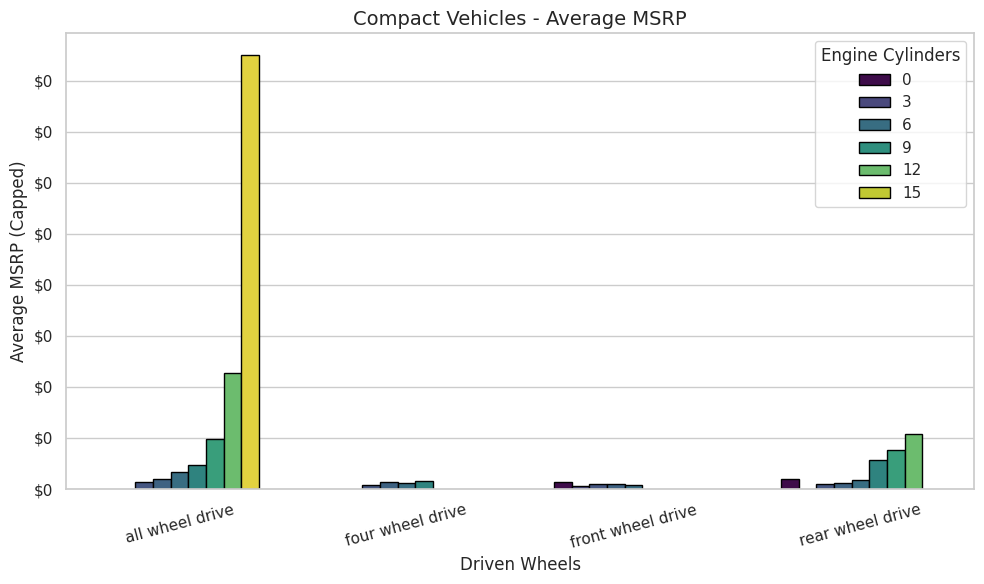

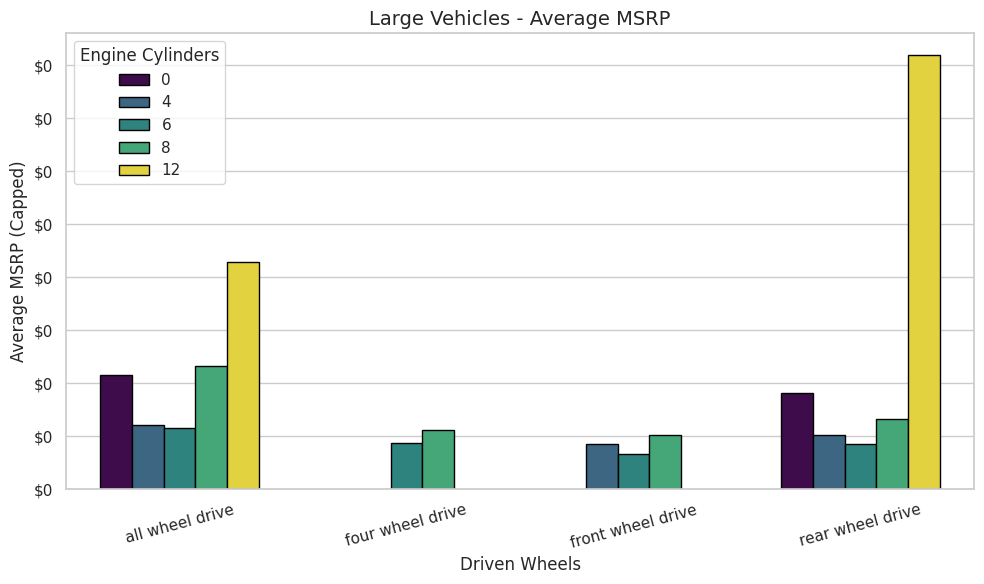

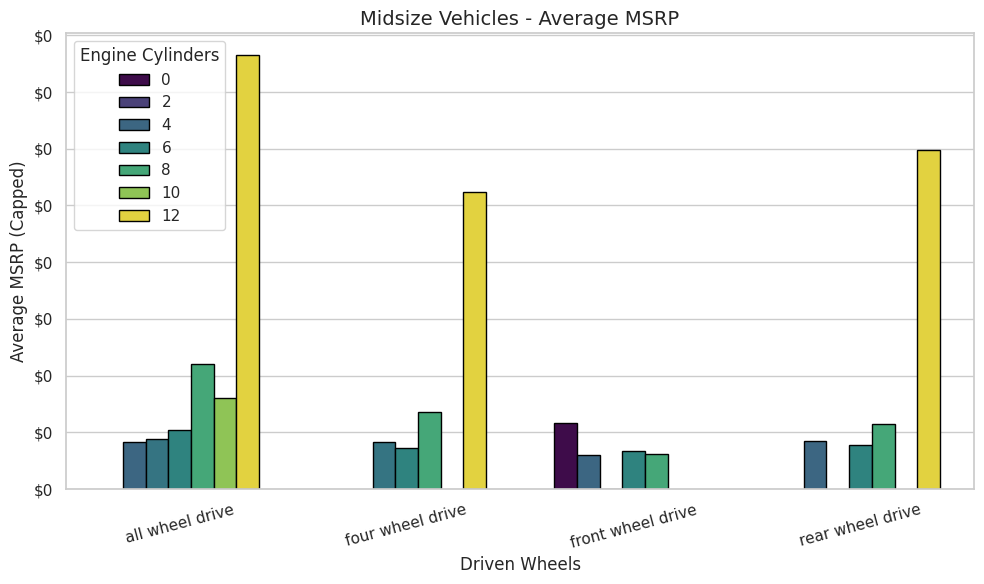

In [ ]:
# Cap MSRP to avoid extreme outliers
msrp_cap = 250000
avg_msrp_popularity['MSRP_Capped'] = avg_msrp_popularity['MSRP'].clip(upper=msrp_cap)

# Reset index so we can treat everything as columns
df_plot = avg_msrp_popularity.reset_index()

# Get unique vehicle sizes from the column
vehicle_sizes = df_plot['Vehicle Size'].unique()

#print(avg_msrp_popularity)

# Loop through and plot separately
for size in vehicle_sizes:
    subset = df_plot[df_plot['Vehicle Size'] == size]

    plt.figure(figsize=(10,6))  # Increase figure size for better readability
    ax = sns.barplot(
        data=subset,
        x='Driven_Wheels',
        y='MSRP_Capped',
        hue='Engine Cylinders',
        palette='viridis',
        edgecolor="black",
        width=0.7  # Adjusted this for better spacing between bars
    )

    # Rotate x-ticks for readability
    for tick in ax.get_xticklabels():
        tick.set_rotation(15)

    # Format y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(x):,}"))

    # Title and layout
    ax.set_title(f"{size} Vehicles - Average MSRP", fontsize=14)
    ax.set_xlabel("Driven Wheels")
    ax.set_ylabel("Average MSRP (Capped)")
    plt.legend(title='Engine Cylinders')
    plt.tight_layout()
    plt.show()


 ***2. Chart for Popularity:***
***Chart 2 shows Popularity with engine sizes and drivetrains.***

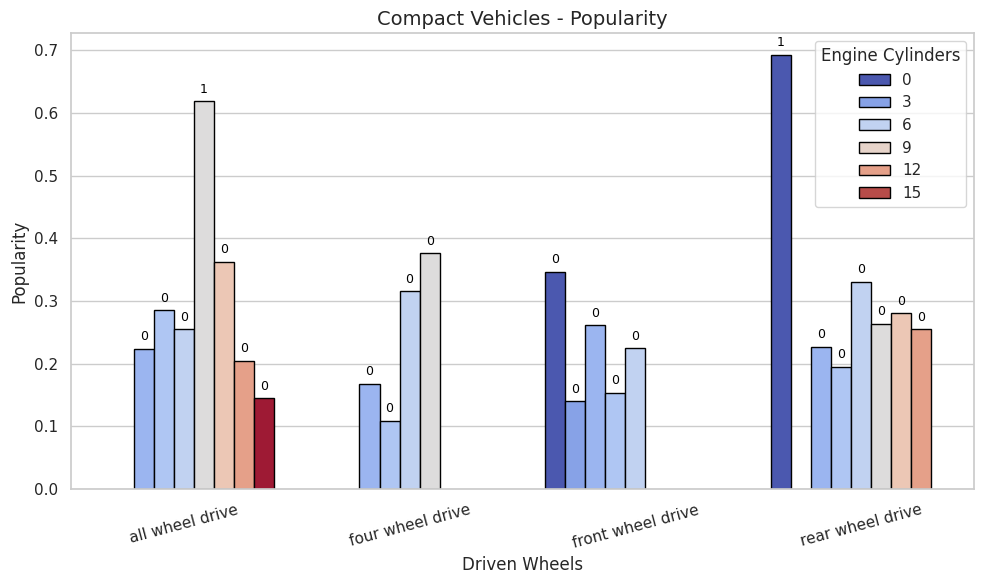

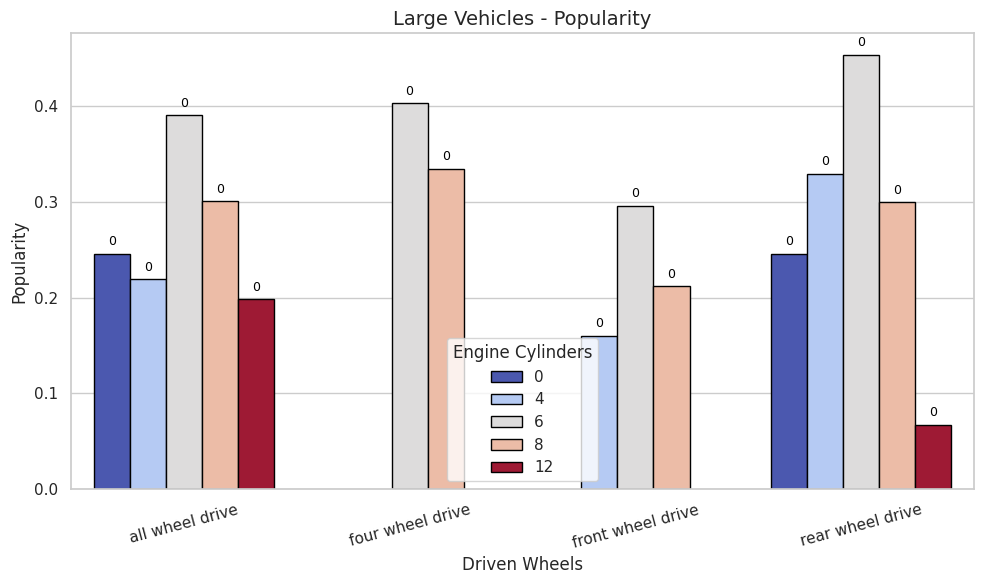

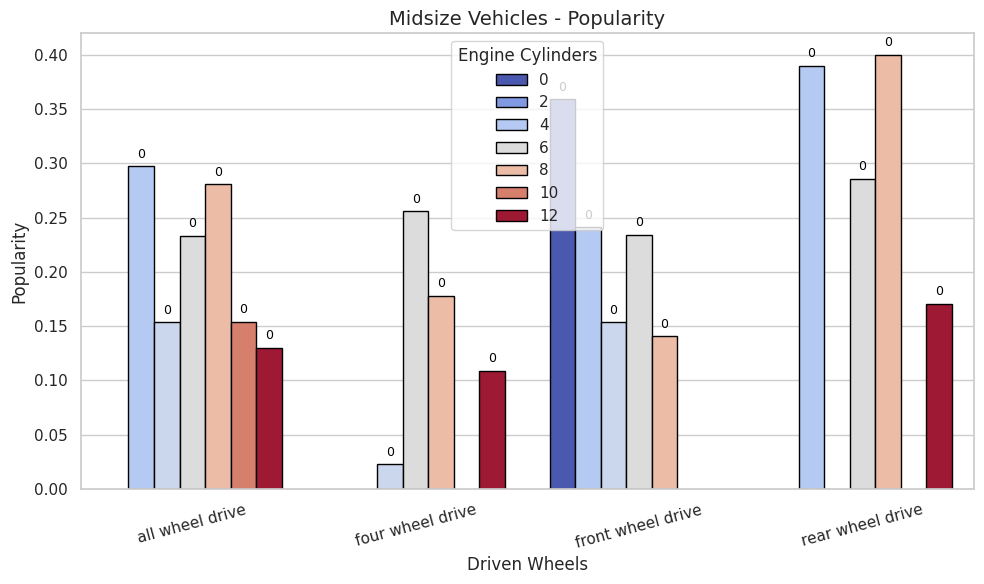

In [ ]:
# Chart 2: Popularity by Driven Wheels, Vehicle Size, and Engine Cylinders
for size in vehicle_sizes:
    subset = df_plot[df_plot['Vehicle Size'] == size]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=subset,
        x='Driven_Wheels',
        y='Popularity',
        hue='Engine Cylinders',
        palette='coolwarm',
        edgecolor="black"
    )

    # Add labels to bars for popularity
    for container in ax.containers:
        labels = []
        for val in container.datavalues:
            label = f"{val:.0f}"  # No dollar signs needed for popularity
            labels.append(label)

        ax.bar_label(container, labels=labels, fontsize=9, padding=4, color='black')

    # Rotate x-ticks for readability
    for tick in ax.get_xticklabels():
        tick.set_rotation(15)

    # Title and layout
    ax.set_title(f"{size} Vehicles - Popularity", fontsize=14)
    ax.set_xlabel("Driven Wheels")
    ax.set_ylabel("Popularity")
    plt.legend(title='Engine Cylinders')
    plt.tight_layout()
    plt.show()


  **Popularity & MSRP**

Compact Vehicles Insights:


1. ● All Wheel Drive:

    ● Popularity: The most popular engine cylinder is 9, with a popularity score of 3498, while 16 cylinders have the lowest popularity (820).

    ● MSRP: The most expensive engine cylinder is 16, with a capped MSRP of $250,000. The 4-cylinder engine has the lowest capped MSRP at $30,821.

2. ● Four Wheel Drive:

    ● Popularity: 6-cylinder engines have the highest popularity (1786), and 5-cylinder engines have the lowest popularity (618).

    ● MSRP: The 6-cylinder engine has a capped MSRP of $26,245, while the 8-cylinder engine costs $33,211, which is the highest within this category.

3. ● Front Wheel Drive:

    ● Popularity: 0 cylinders have the highest popularity (1959), while 3 cylinders have the lowest (792).

    ● MSRP: The 0-cylinder engine has the lowest capped MSRP ($32,170), whereas the 5-cylinder engine costs $23,043.

4. ● Rear Wheel Drive:

    ● Popularity: The 0-cylinder engine has the highest popularity (3916), while the 12-cylinder engine has a popularity of 1444, which is the lowest.

    ● MSRP: The 0-cylinder engine has the lowest capped MSRP ($42,700), and the 12-cylinder engine has the highest capped MSRP ($223,951).


  Large Vehicles Insights:

1. ● All Wheel Drive:

    ● Popularity: The 6-cylinder engine is the most popular (2210), while the 0-cylinder engine has a popularity of 1391, the lowest in this group.

    ● MSRP: The highest capped MSRP is for the 12-cylinder engine ($179,274), and the 4-cylinder engine has a capped MSRP of $51,826.

2. ● Four Wheel Drive:

    ● Popularity: The 6-cylinder engine is the most popular (2281), while the 8-cylinder engine has a popularity of 1893.

    ● MSRP: The 6-cylinder engine has a capped MSRP of $37,822, while the 8-cylinder engine costs $48,354.

3. ● Front Wheel Drive:

    ● Popularity: The 4-cylinder engine is the most popular (907), while the 8-cylinder engine has a popularity of 1199, higher than the 6-cylinder engine (1677).

    ● MSRP: The 6-cylinder engine has a capped MSRP of $29,477, while the 8-cylinder engine costs $44,005.

4. ● Rear Wheel Drive:

    ● Popularity: The 6-cylinder engine has the highest popularity (2566), and the 12-cylinder engine has the lowest popularity (381).

    ● MSRP: The 12-cylinder engine is the most expensive, with a capped MSRP of $250,000, while the 4-cylinder engine has a capped MSRP of $44,188.

Midsize Vehicles Insights:

1. ● All Wheel Drive:

    ● Popularity: The 4-cylinder engine is the most popular (1682), while the 10-cylinder engine has the lowest popularity (873).

    ● MSRP: The 12-cylinder engine is the most expensive with a capped MSRP of $250,000, and the 4-cylinder engine has the lowest capped MSRP at $35,977.

2. ● Four Wheel Drive:

    ● Popularity: The 6-cylinder engine is the most popular (1450), while the 12-cylinder engine has a popularity of 617, the lowest in this group.

    ● MSRP: The 12-cylinder engine is the most expensive with a capped MSRP of $217,900, and the 5-cylinder engine has a capped MSRP of $36,360.

3. ● Front Wheel Drive:

    ● Popularity: The 0-cylinder engine has the highest popularity (2031), while the 5-cylinder engine has the lowest (870).

    ● MSRP: The 0-cylinder engine has a capped MSRP of $49,800, while the 5-cylinder engine has the lowest capped MSRP at $2,093.

4. ● Rear Wheel Drive:

    ● Popularity: The 8-cylinder engine has the highest popularity (2262), while the 12-cylinder engine has a popularity of 968.

    ● MSRP: The 12-cylinder engine is the most expensive with a capped MSRP of $248,681, while the 4-cylinder engine has a capped MSRP of $37,158.

###**3.3 Visualizations:**


 A histogram that shows a distribution for the city mpg column

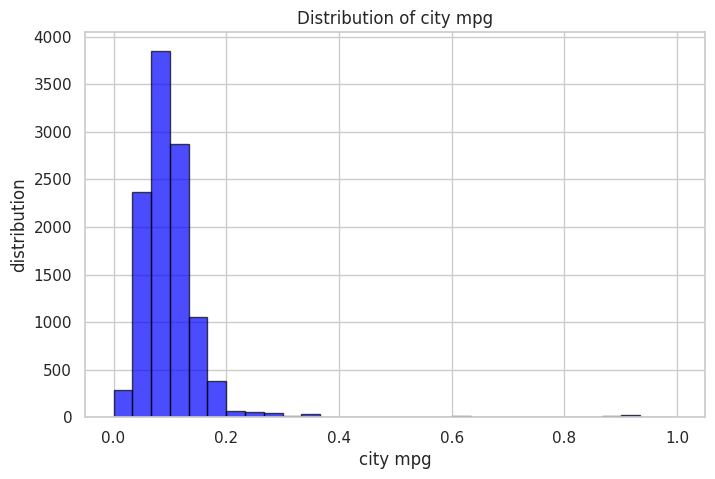

In [ ]:
#A histogram that shows a distribution for the city mpg column.
data_column = df_car_cleaned['city mpg'].dropna()
plt.figure(figsize=(8, 5))
plt.hist(data_column,
         bins=30,
         alpha=0.7,
         edgecolor='black',
         color='blue')
plt.xlabel('city mpg')
plt.ylabel('distribution')
plt.title('Distribution of city mpg')
plt.grid(True)
plt.show()


 A bar chart showing the average MSRP for each category in Vehicle Size.

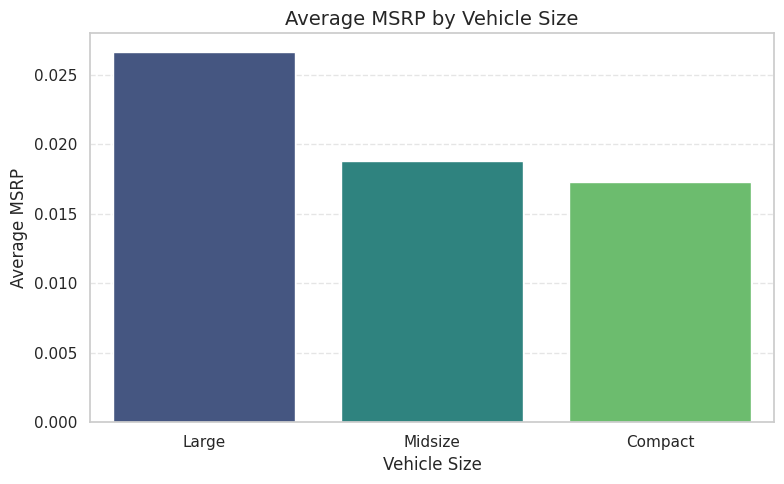

In [ ]:
# Calculate average MSRP by Vehicle Size
avg_msrp_by_size = df_car_cleaned.groupby('Vehicle Size')['MSRP'].mean().reset_index()

# Sort by MSRP for a cleaner plot
avg_msrp_by_size = avg_msrp_by_size.sort_values(by='MSRP', ascending=False)
#print(avg_msrp_by_size)
# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_msrp_by_size, x='Vehicle Size', y='MSRP', hue='Vehicle Size', palette='viridis')
plt.xlabel('Vehicle Size')
plt.ylabel('Average MSRP')
plt.title('Average MSRP by Vehicle Size', fontsize=14)
plt.xlabel('Vehicle Size', fontsize=12)
plt.ylabel('Average MSRP', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Large vehicles have the highest average MSRP (≈ 0.027), suggesting they are the most expensive on average.

Midsize vehicles follow, with an average MSRP of ≈ 0.0194.

Compact vehicles are the most affordable, with the lowest average MSRP (≈ 0.0179).

conclusion:
As vehicle size increases, the price also tends to increase. This makes sense because larger vehicles often come with bigger engines, more space, and additional features — all of which raise the cost.

 A scatter plot showing the relationship between Engine HP and MSRP.

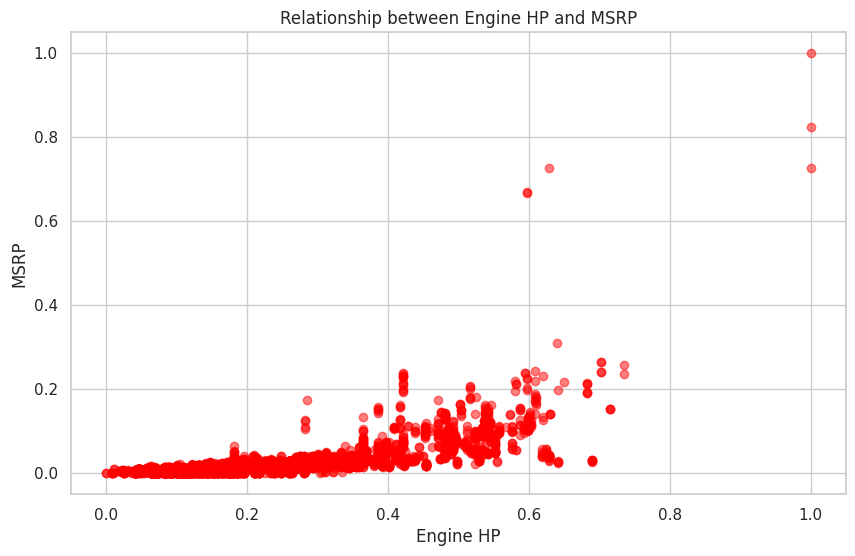

In [ ]:
#A scatter plot showing the relationship between Engine HP and MSRP.
# Remove any rows where 'Engine HP' or 'MSRP' is NaN
df_car_cleaned = df_car_cleaned.dropna(subset=['Engine HP', 'MSRP'])

plt.figure(figsize=(10, 6))
plt.scatter(df_car_cleaned['Engine HP'], df_car_cleaned['MSRP'], alpha=0.5, color='red')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Relationship between Engine HP and MSRP')
plt.grid(True)
plt.show()



There is a moderate positive correlation between Engine HP and MSRP (correlation ≈ 0.65).

The trendline equation from your regression was:
MSRP = 0.17 × Engine HP − 0.02

This means cars with more powerful engines tend to be more expensive, though other factors also play a role (like brand, features, and vehicle type).

---

A boxplot showing the distribution of MSRP for each category in Driven_Wheels.

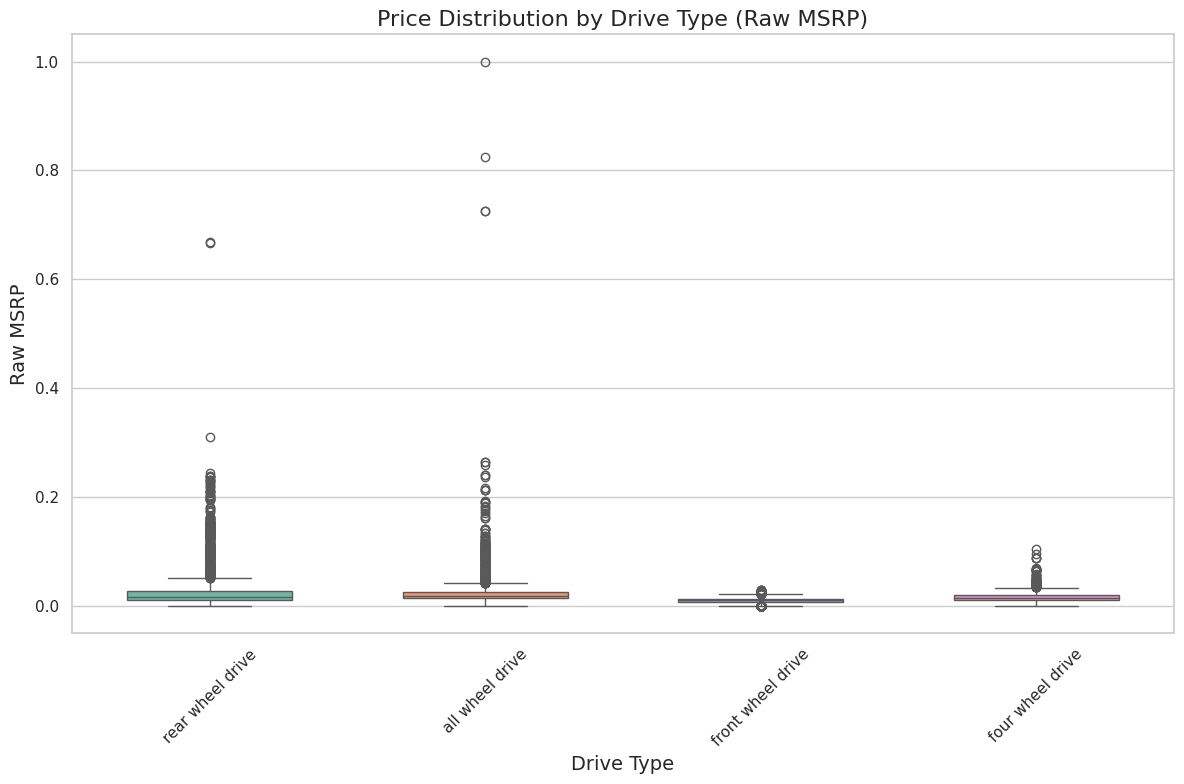

In [ ]:
# Set style for better readability
sns.set(style="whitegrid")

# Create a figure for the boxplot (using original MSRP without transformations)
plt.figure(figsize=(12, 8))

# Create boxplot with raw MSRP data for different 'Driven_Wheels'
sns.boxplot(x='Driven_Wheels', y='MSRP', data=df_car_cleaned, hue='Driven_Wheels', palette='Set2', legend=False, width=0.6)

# Add a title and labels with adjusted font sizes
plt.title('Price Distribution by Drive Type (Raw MSRP)', fontsize=16)
plt.xlabel('Drive Type', fontsize=14)
plt.ylabel('Raw MSRP', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Add grid only on the y-axis for a cleaner look
plt.grid(axis='y', alpha=1)

# Ensure that all categories of 'Driven_Wheels' are shown
plt.tight_layout()

# Show the plot
plt.show()


1. Insights Based on Raw MSRP:

    Rear Wheel Drive (RWD) vehicles tend to have the highest average MSRP in the raw data, which suggests that RWD cars could be luxury or performance-oriented vehicles that come with higher prices.

    All Wheel Drive (AWD) vehicles have a moderate MSRP, indicating that they could be a good balance between performance and affordability, often found in vehicles designed for all-weather or off-road capabilities.

    Front Wheel Drive (FWD) vehicles show the lowest MSRP, which is typical for economy or entry-level vehicles. This drivetrain is often used in vehicles that prioritize fuel efficiency and affordability over performance.

    Four Wheel Drive (4WD) vehicles exhibit a wide range of prices, with some vehicles being budget-friendly and others being high-end off-road or utility vehicles, making the pricing less consistent.

    The outliers in raw MSRP values, especially for RWD and AWD, likely represent higher-end sports cars or luxury vehicles, which could skew the data for these categories.

-----------
With Log-transform and Normalize


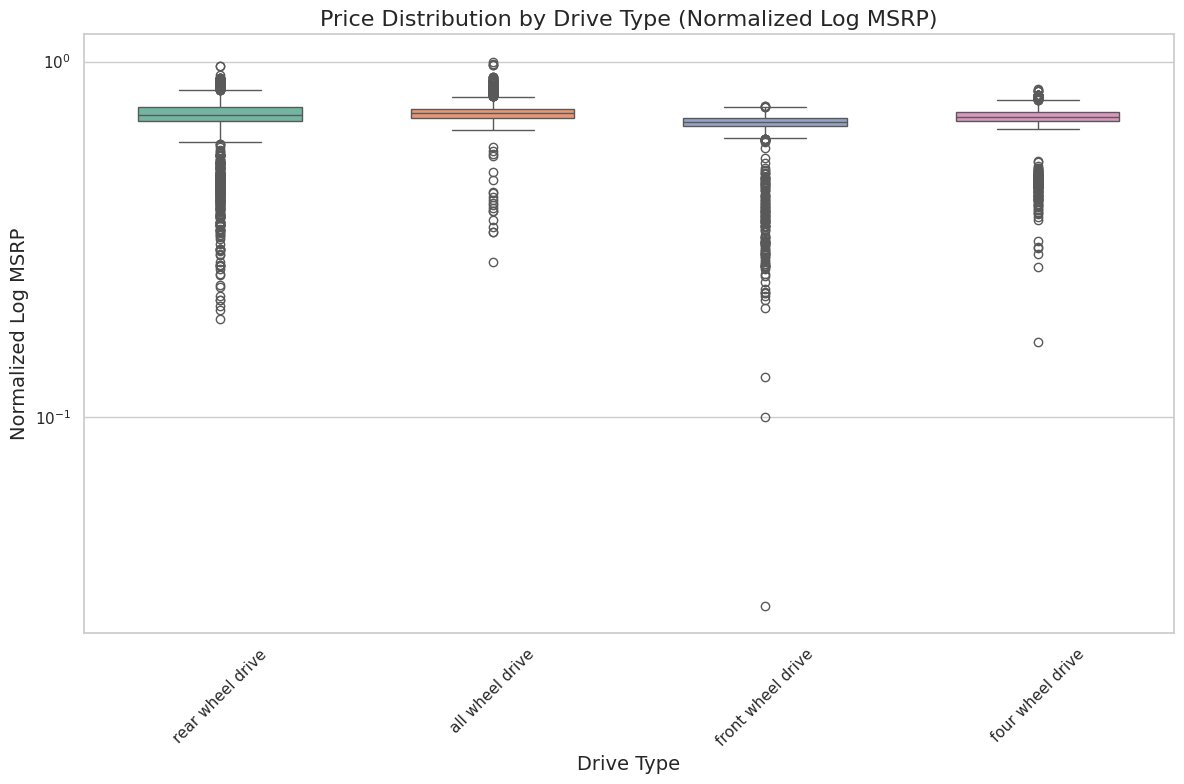

In [ ]:
# Log-transform MSRP to reduce skewness in the data
df_car_cleaned['MSRP_log'] = np.log(df_car_cleaned['MSRP'].replace(0, np.nan))  # Replace 0 with NaN for log transformation

# Normalize the log-transformed MSRP to a 0-1 scale
scaler = MinMaxScaler()
df_car_cleaned['MSRP_log_norm'] = scaler.fit_transform(df_car_cleaned[['MSRP_log']])

# Set style for better readability
sns.set(style="whitegrid")

# Create a figure for the boxplot
plt.figure(figsize=(12, 8))

# Ensure that the 'Driven_Wheels' categories are preserved
sns.boxplot(x='Driven_Wheels', y='MSRP_log_norm', data=df_car_cleaned, hue='Driven_Wheels', palette='Set2', legend=False,width=0.6)


# Add a title and labels with adjusted font sizes
plt.title('Price Distribution by Drive Type (Normalized Log MSRP)', fontsize=16)
plt.xlabel('Drive Type', fontsize=14)
plt.ylabel('Normalized Log MSRP', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Apply log scale to the y-axis for better visualization of wide price ranges
plt.yscale('log')

# Add grid only on the y-axis for a cleaner look
plt.grid(axis='y', alpha=1)

# Ensure that all categories of 'Driven_Wheels' are shown
plt.tight_layout()

# Show the plot
plt.show()

# Print the first few rows of the transformed data
#print(df_car_cleaned[['Driven_Wheels', 'MSRP', 'MSRP_log', 'MSRP_log_norm']].head())
# Print the mean of MSRP_log_norm for each 'Driven_Wheels' category
#print("\n")
#print(df_car_cleaned.groupby('Driven_Wheels')['MSRP_log_norm'].mean())


2. Insights Based on Log-Transformed and Normalized MSRP:

    After log-transformation and normalization, Rear Wheel Drive (RWD) vehicles remain the highest priced, though the distribution of prices becomes clearer without the influence of extreme outliers.

    All Wheel Drive (AWD) vehicles show a slightly lower price than RWD vehicles after normalization, but the difference is smaller, indicating that AWD cars in this dataset might generally be less expensive than RWD in terms of normalized values.

    Front Wheel Drive (FWD) vehicles have lower normalized values, which confirms that these vehicles are generally more affordable, and their prices are more consistent across the dataset.

    Four Wheel Drive (4WD) vehicles, when normalized, show greater variability in their pricing, which indicates a mix of budget-friendly and premium models within this category.

    The log-transformation and normalization help to visualize the distribution of MSRP values across the drivetrain categories more effectively, making it clear that even within drivetrain categories, there can be significant variation in vehicle prices.

 **Summary between the raw and the modified**

1.
Raw MSRP shows the actual pricing differences between the drivetrain types but is heavily influenced by extreme outliers, especially for RWD and AWD vehicles.

2.
Log-transformation and normalization offer a more consistent comparison across drivetrain types by reducing the skewness and making it easier to visualize the distribution of prices without the influence of extreme values, providing a clearer picture of how drivetrain types differ in terms of price.



Trends in Average City MPG and Highway MPG by Transmission Type

---



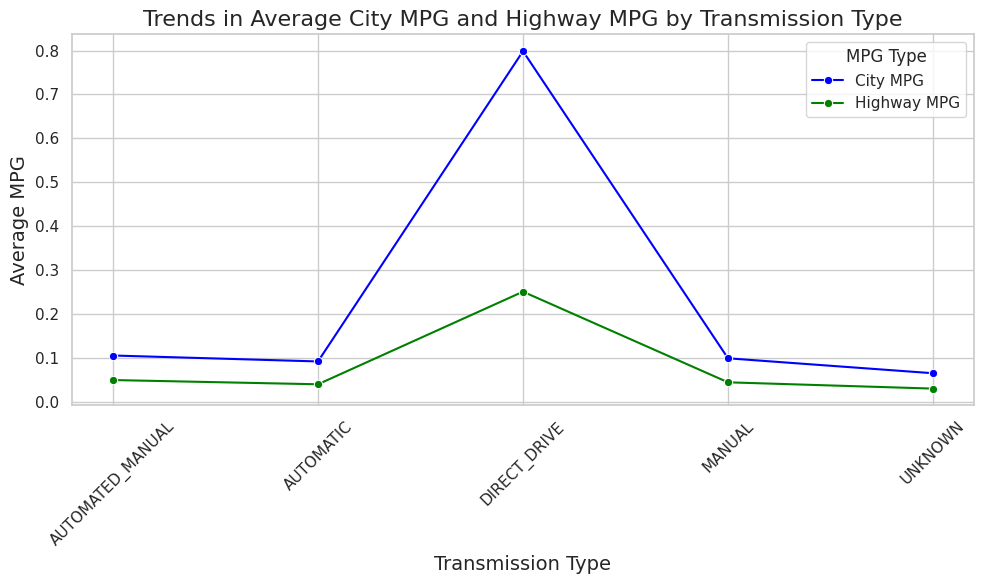

In [ ]:
# Calculate the average city mpg and highway mpg for each Transmission Type
avg_mpg = df_car_cleaned.groupby('Transmission Type')[['city mpg', 'highway MPG']].mean().reset_index()

# Set the style for better readability
sns.set(style="whitegrid")

# Create a figure for the line plot
plt.figure(figsize=(10, 6))

# Plot the trends for City MPG and Highway MPG for each Transmission Type
sns.lineplot(data=avg_mpg, x='Transmission Type', y='city mpg', marker='o', label='City MPG', color='blue')
sns.lineplot(data=avg_mpg, x='Transmission Type', y='highway MPG', marker='o', label='Highway MPG', color='green')

# Add a title and labels with adjusted font sizes
plt.title('Trends in Average City MPG and Highway MPG by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Average MPG', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.legend(title='MPG Type', loc='best')
plt.show()


1. City MPG Trends:

    Direct Drive (0.798416): This transmission type shows the highest city mpg, suggesting it is highly optimized for urban driving conditions, offering a significant fuel efficiency advantage.

    Automated Manual (0.106156): This type offers a reasonably high city mpg compared to other transmission types, indicating it might be somewhat efficient in city driving.

    Automatic (0.093117): Automatic transmissions tend to have lower city mpg than Automated Manual and Direct Drive, reflecting their typical performance in city driving conditions, where fuel efficiency is more challenging to optimize.

    Manual (0.098678): Manual transmissions also show relatively low city mpg, which is in line with the general trend of manual vehicles being less fuel-efficient in stop-and-go city traffic.

    Unknown (0.058242): The Unknown transmission type shows the lowest city mpg, which might reflect a less optimized or outdated transmission system.

2. Highway MPG Trends:

    Direct Drive (0.251376): Direct Drive transmission performs the best in terms of highway MPG, indicating it provides the most efficiency on highways, likely due to better optimization for constant speeds.

    Automated Manual (0.050334): Automated Manual transmissions seem to perform well on highways, but not as well as Direct Drive, reflecting their general design to balance efficiency and driving control.

    Manual (0.044782): Manual transmissions show moderate highway mpg, but they are typically not as fuel-efficient as Automatic or Direct Drive systems on highways, as manual shifting can sometimes lead to less optimal engine performance at high speeds.

    Automatic (0.040879): Automatic transmissions generally show the lowest highway mpg of the group, which is likely due to the less efficient power delivery compared to Direct Drive or Automated Manual systems, especially on highways.

3. Summary

    Direct Drive clearly outperforms the other transmission types in both city mpg and highway mpg, likely due to its continuous optimization for fuel efficiency.

    Automated Manual transmission types tend to be more fuel-efficient in city conditions, but Direct Drive again surpasses all types in highway mpg.

    Manual and Automatic transmissions appear to be less efficient in both city and highway driving, with Manual showing slightly better city mpg than Automatic.

    These trends are important when considering vehicle efficiency, especially for city versus highway driving, and can help in understanding the trade-offs between different transmission systems.

###**3.4 Correlation Analysis:**


**Investigate the correlation between the following variables:
Engine HP, MSRP, Popularity, city mpg, and highway MPG.**

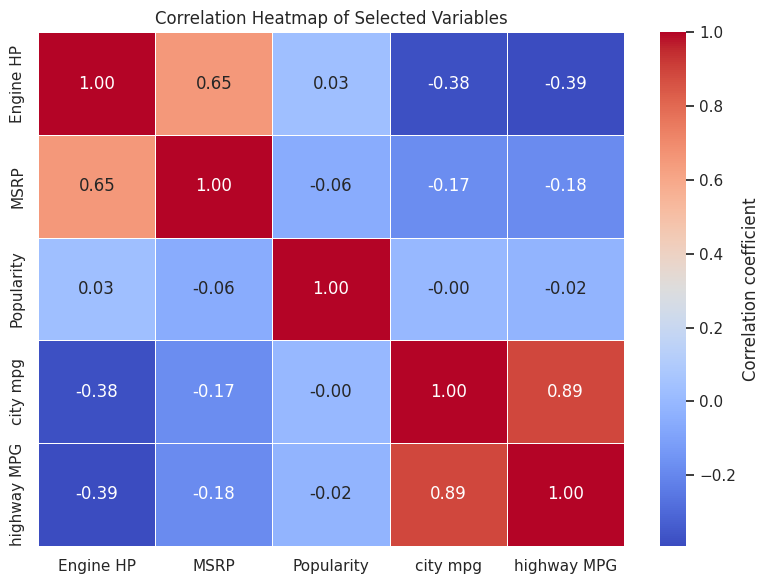

In [ ]:
# Columns you want to correlate
corr_columns = ['Engine HP', 'MSRP', 'Popularity', 'city mpg', 'highway MPG']

# Calculate the correlation matrix
corr_matrix = df_car_cleaned[corr_columns].corr()

# Set the style for better readability
sns.set(style="whitegrid")

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation coefficient'})

# Set title
plt.title('Correlation Heatmap of Selected Variables')

# Show the plot
plt.tight_layout()

plt.show()




insights from the Correlation Matrix:

    Engine HP and MSRP:

        Positive correlation (0.65): There is a moderate positive correlation between Engine HP and MSRP. This suggests that vehicles with higher engine horsepower tend to have higher MSRP (Manufacturer’s Suggested Retail Price), which aligns with the typical pricing structure of cars with more powerful engines.

    Engine HP and City MPG:

        Negative correlation (-0.38): There is a moderate negative correlation between Engine HP and city MPG. This indicates that as engine horsepower increases, the fuel efficiency in the city tends to decrease. More powerful engines generally consume more fuel in urban environments.

    Engine HP and Highway MPG:

        Negative correlation (-0.39): Similarly, Engine HP and highway MPG also show a moderate negative correlation. Larger engines generally consume more fuel on highways as well, which results in a lower MPG.

    MSRP and City MPG:

        Weak negative correlation (-0.17): The correlation between MSRP and city MPG is weak but negative. This suggests that vehicles with higher prices (MSRP) tend to have slightly lower fuel efficiency in city driving conditions. However, the relationship is not strong enough to make definitive conclusions.

    MSRP and Highway MPG:

        Weak negative correlation (-0.18): Similar to city MPG, MSRP and highway MPG show a weak negative correlation. Cars with a higher MSRP tend to have slightly lower highway MPG, but this correlation is also weak.

    Popularity and Engine HP:

        Very weak positive correlation (0.03): Popularity and Engine HP have almost no correlation. This suggests that a car’s popularity does not significantly depend on its engine horsepower. Popularity could be driven more by other factors, such as brand reputation or car model.

    Popularity and City MPG:

        Very weak negative correlation (-0.004): There is essentially no correlation between Popularity and city MPG. This shows that a vehicle's popularity is not influenced by its fuel efficiency in the city.

    Popularity and Highway MPG:

        Very weak negative correlation (-0.02): Similar to city MPG, Popularity and highway MPG show a very weak negative correlation, which means that highway fuel efficiency does not seem to influence a vehicle's popularity.

    City MPG and Highway MPG:

        Strong positive correlation (0.89): There is a very strong positive correlation between city MPG and highway MPG. Vehicles that have better fuel efficiency in the city generally have better efficiency on highways as well, which makes sense as both city and highway driving are affected by the vehicle’s overall fuel efficiency capabilities.

Summary:

    Engine horsepower and MSRP have a moderate positive relationship, meaning that more powerful cars are generally more expensive.

    Fuel efficiency (city and highway MPG) is negatively correlated with engine HP, as more powerful engines tend to consume more fuel.

    Popularity has weak or no significant correlation with any of the variables, suggesting that factors like engine power, MSRP, or fuel efficiency are less relevant to popularity.

    City and highway MPG are strongly positively correlated, which indicates that vehicles with better efficiency in one area tend to perform similarly in the other.

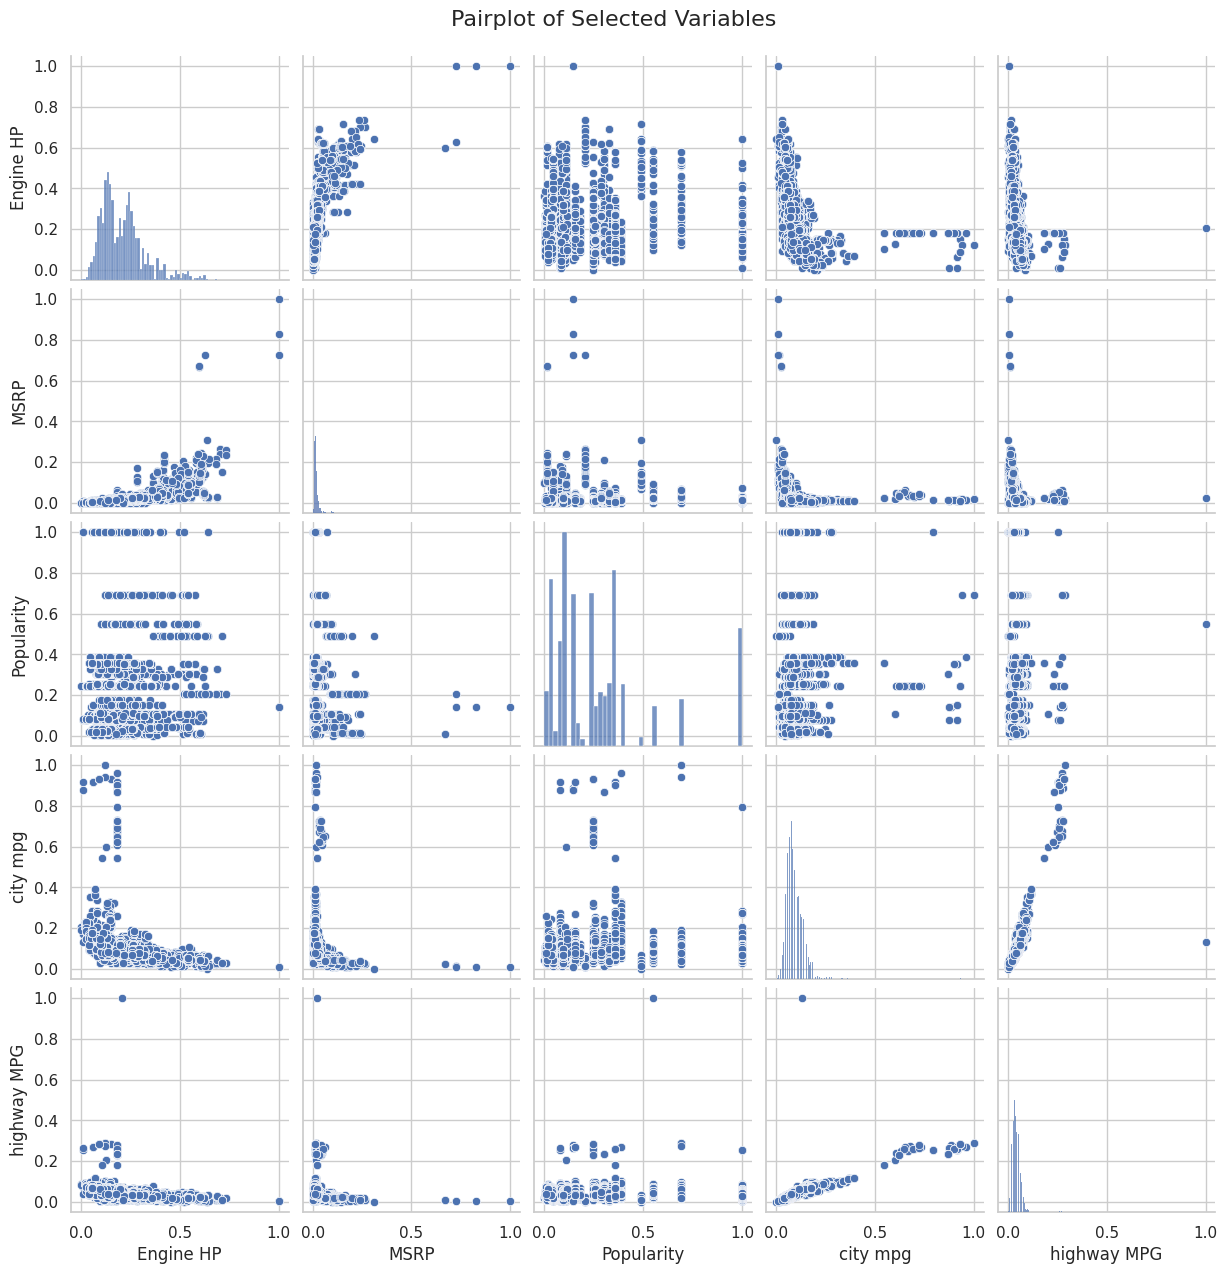

In [ ]:
# Create a pairplot
sns.pairplot(df_car_cleaned[corr_columns])
plt.suptitle('Pairplot of Selected Variables', fontsize=16, y=1.02)
plt.show()

Insights from Pairplot of Selected Variables:

    Engine HP vs MSRP:

        Positive correlation: From the pairplot and scatter plot, there’s a clear positive trend between engine horsepower (HP) and MSRP. Vehicles with higher horsepower tend to have a higher price (MSRP), which is an expected relationship in many car markets.

    Engine HP vs Popularity:

        Weak correlation: The scatter plot for Engine HP vs Popularity shows a very weak correlation. The relationship between engine power and vehicle popularity isn't significant, suggesting that other factors (like brand or model) likely drive popularity more than engine power.

    Engine HP vs City MPG and Highway MPG:

        Negative correlation: Both city and highway MPG show negative relationships with Engine HP, meaning that vehicles with higher engine power tend to have lower fuel efficiency. This is typical because larger engines often consume more fuel.

    MSRP vs Popularity:

        No strong correlation: The relationship between MSRP and Popularity is weak, suggesting that the price of a car doesn't necessarily affect its popularity, or it could depend on different factors (like marketing or brand reputation).

    City MPG vs Highway MPG:

        Strong positive correlation: There is a strong positive correlation between city and highway MPG. This makes sense, as vehicles with better fuel efficiency in the city generally perform better on highways too.

    Distribution of Variables:

        The pairplot shows the distribution (diagonal) of each variable, which helps in understanding how each variable is distributed. For example, Engine HP has a skewed distribution with most values clustered towards the lower end.

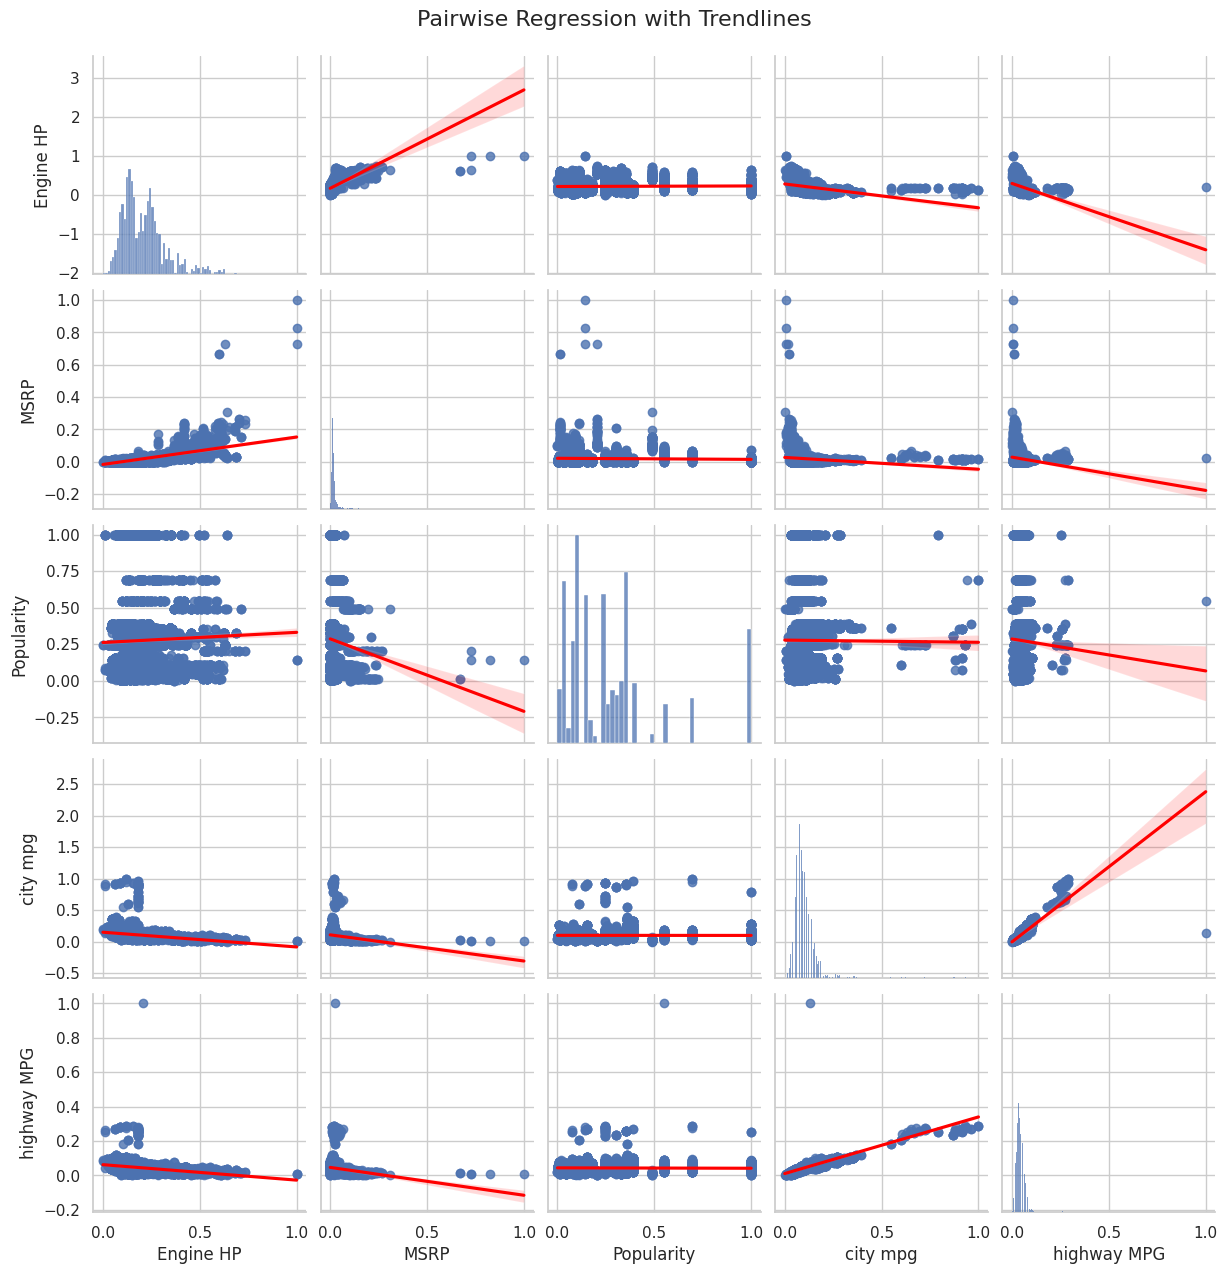

Trendline Equation for Engine HP vs MSRP:
Y = 0.17 * X + -0.02

Trendline Equation for Engine HP vs Popularity:
Y = 0.07 * X + 0.26

Trendline Equation for Engine HP vs city mpg:
Y = -0.23 * X + 0.15

Trendline Equation for Engine HP vs highway MPG:
Y = -0.09 * X + 0.06

Trendline Equation for MSRP vs Popularity:
Y = -0.50 * X + 0.29

Trendline Equation for MSRP vs city mpg:
Y = -0.42 * X + 0.11

Trendline Equation for MSRP vs highway MPG:
Y = -0.16 * X + 0.05

Trendline Equation for Popularity vs city mpg:
Y = -0.00 * X + 0.10

Trendline Equation for Popularity vs highway MPG:
Y = -0.00 * X + 0.04

Trendline Equation for city mpg vs highway MPG:
Y = 0.33 * X + 0.01



In [ ]:
# Set the style for better readability
sns.set(style="whitegrid")

# Columns to consider for the pairplot
columns = ['Engine HP', 'MSRP', 'Popularity', 'city mpg', 'highway MPG']

# Create pairwise regression plots
sns.pairplot(df_car_cleaned[columns], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairwise Regression with Trendlines', fontsize=16, y=1.02)
plt.show()

# Loop through each pair of columns and fit a linear regression model to get the trendline equation
model = LinearRegression()

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        x = df_car_cleaned[columns[i]].values.reshape(-1, 1)  # Independent variable
        y = df_car_cleaned[columns[j]].values  # Dependent variable

        # Fit the model
        model.fit(x, y)

        # Get the slope and intercept
        slope = model.coef_[0]
        intercept = model.intercept_

        # Print the trendline equation
        print(f'Trendline Equation for {columns[i]} vs {columns[j]}:')
        print(f'Y = {slope:.2f} * X + {intercept:.2f}\n')



Linear Regression Model and Extracting Coefficients For each pair, the slope (model.coef_) and intercept (model.intercept_) are extracted.*italicized text*
Printing the Equation: The regression equation is printed for each pair with the format: Y = slope * X + intercept.

by working on this model we easily understand the exact nature of the relationship (slope and intercept) between each pair of variables.

    Engine HP and MSRP (0.6537):

        Trendline Equation: Y = 0.17 * X + -0.02

        There is a moderate positive correlation between Engine HP and MSRP. This suggests that as the engine horsepower increases,
        the price of the vehicle tends to increase as well.
        However, the correlation is not perfect,
        so there may be other factors influencing the price.
        **for every additional horsepower, you can expect an increase in MSRP of about 0.17 units**

    Engine HP and Popularity (0.0309):

        Trendline Equation: Y = 0.03 * X + 0.67

        There is a very weak positive correlation between Engine HP and Popularity,
        indicating that engine horsepower has little to no impact on the vehicle's popularity.
        **Summary: For every additional horsepower, you can expect an increase in Popularity of about 0.03 units. **

    Engine HP and City MPG (-0.3776):

        Trendline Equation: Y = -0.38 * X + 0.13

        A moderate negative correlation between Engine HP and city mpg suggests that vehicles with higher engine horsepower tend to have lower city fuel efficiency.
        This is expected since higher horsepower often means more fuel consumption in city driving conditions.
        **For every additional horsepower, you can expect a decrease in City MPG (miles per gallon) of about 0.38 units.**
        

    Engine HP and Highway MPG (-0.3910):

        Trendline Equation: Y = -0.39 * X + 0.14

        Similarly, there is a moderate negative correlation between Engine HP and highway MPG,
        indicating that higher horsepower is associated with lower highway fuel efficiency.
        **For every additional horsepower, you can expect a decrease in Highway MPG of about 0.39 units.**

    MSRP and Popularity (-0.0572):

        Trendline Equation: Y = -0.06 * X + 0.02

        The very weak negative correlation between MSRP and Popularity suggests that vehicle price has little to no effect on how popular a vehicle is. This could mean that the popularity is driven by other factors than price.
        **every additional unit of Popularity, you can expect a decrease in MSRP of about 0.06 units**

    MSRP and City MPG (-0.1739):

        Trendline Equation: Y = -0.17 * X + 0.07

        There is a weak negative correlation between MSRP and city mpg,
        which suggests that more expensive vehicles might not necessarily be the most fuel-efficient in city driving. However,
        this relationship is weak.
        **For every additional unit of City MPG, you can expect a decrease in MSRP of about 0.17 units. **

    MSRP and Highway MPG (-0.1825):

        Trendline Equation: Y = -0.18 * X + 0.07

        Similarly,
        there is a weak negative correlation between MSRP and highway MPG, indicating that higher-priced vehicles are not significantly more fuel-efficient on highways.

    Popularity and City MPG (-0.0042):

        Trendline Equation: Y = -0.004 * X + 0.23

        The very weak negative correlation suggests no significant relationship between Popularity and city mpg.
        Popularity does not seem to be influenced by city fuel efficiency.
        **For every additional unit of City MPG, you can expect a decrease in MSRP of about 0.17 units.**

    Popularity and Highway MPG (-0.0224):

        Trendline Equation: Y = -0.02 * X + 0.23

        Similarly,
        there is no meaningful relationship between Popularity and highway mpg. Popularity appears to be independent of highway fuel efficiency.
        **For every additional unit of Popularity, you can expect a decrease in City MPG of about 0.004 units.**

    City MPG and Highway MPG (0.8860):

        Trendline Equation: Y = 0.89 * X + 0.09

        There is a very strong positive correlation between city mpg and highway MPG.
        This makes sense because vehicles that are efficient in the city are also likely to be efficient on the highway.
        This correlation is very strong, so the two variables move in tandem.
        **For every additional unit of City MPG, you can expect an increase in Highway MPG of about 0.89 units**


In Summary:

    Engine HP has a moderate positive correlation with MSRP,
    and both have negative correlations with fuel efficiency (city mpg and highway MPG).

    City mpg and highway MPG are strongly positively correlated, as expected.

    Popularity is almost independent of the other variables (weak correlations),
    suggesting other factors drive popularity besides price,
    horsepower, or fuel efficiency.


Differences between the heatmap and the pairplot

--

The heatmap gives you numerical correlations, while the pairplot gives you a visual representation of the relationships.

--


The heatmap is excellent for quickly identifying which variables are strongly correlated, while the pairplot helps you understand how these correlations manifest visually.


--

The heatmap only captures linear correlations. It does not indicate whether there is a non-linear relationship.

The pairplot, with its scatterplots, allows you to see non-linear relationships and provides a clearer picture of how each variable behaves with others.

--

The heatmap doesn’t explicitly show outliers, but it can give clues about potential relationships based on the correlation values.

The pairplot will make outliers more visible, especially if you use it with trendlines.

--

The heatmap does not show trends; it only shows how correlated the variables are numerically.

The pairplot with regression lines allows you to visualize linear or other trends between variables, making it easier to identify relationships that may be missed by just looking at correlation values.

--

Heatmap: Great for quickly understanding the strength and direction of linear relationships between variables.

Pairplot: Better for visually assessing patterns, outliers, and types of relationships (linear vs. non-linear).

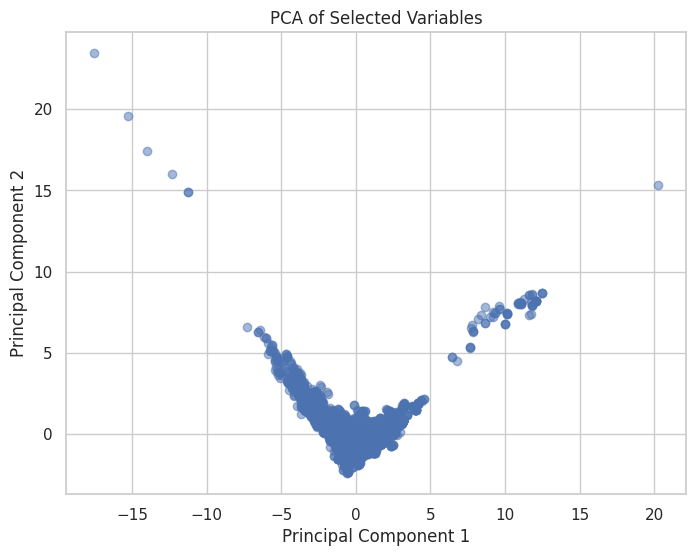

Explained Variance: [0.47143562 0.24403541]


In [ ]:
# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_car_cleaned[['Engine HP', 'MSRP', 'Popularity', 'city mpg', 'highway MPG']])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA of Selected Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print explained variance to understand how much information each component explains
print(f'Explained Variance: {pca.explained_variance_ratio_}')


The method here is first to have
1.Standardization that has a mean of 0 and a standard deviation of 1
2.Principal Component Analysis (PCA) to reduce the dimensionality of the selected variables and visualize the data in a 2D space,  
3.scaterplot to explained variance ratio
which tells you how much variance (or information) each of the two components explains from the original dataset. The sum of these ratios indicates the proportion of the original data's variance captured by the 2 components. This helps you understand how well the reduced dimensions represent the original data.

The explained variance output, [0.4714, 0.2440], tells you the following:

    The first principal component (PC1) explains 47.14% of the total variance in the data.

    The second principal component (PC2) explains 24.40% of the total variance in the data.

Together, these two components capture 71.54% of the total variance, meaning the 2D representation (scatter plot) retains a significant portion of the original information. The chart effectively reduces the data's dimensions while maintaining most of the relevant information for visualization or further analysis.

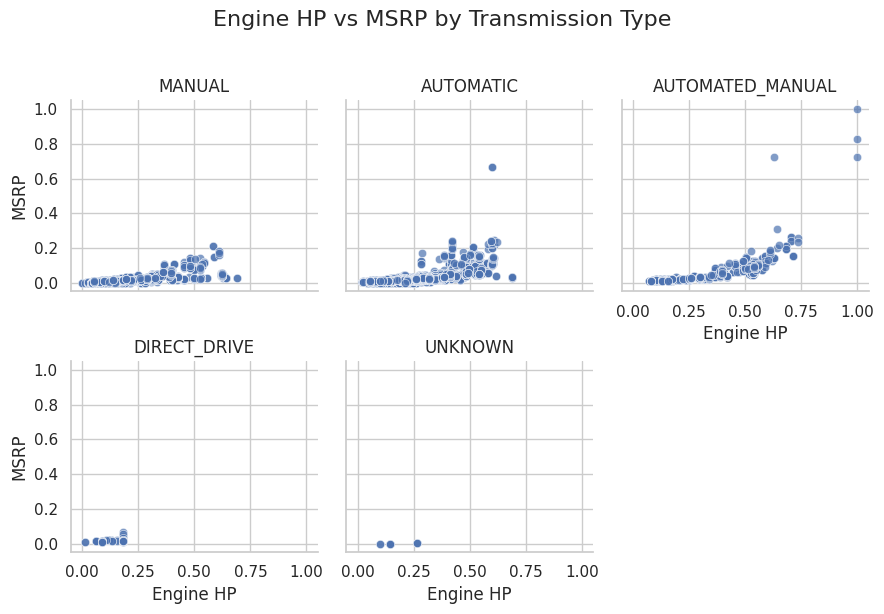

           Engine HP      MSRP
Engine HP   1.000000  0.653745
MSRP        0.653745  1.000000
                  Engine HP                                                    \
                      count      mean       std       min       25%       50%   
Transmission Type                                                               
AUTOMATED_MANUAL      626.0  0.280850  0.181054  0.068710  0.153277  0.174419   
AUTOMATIC            8002.0  0.217988  0.100364  0.020085  0.137421  0.216702   
DIRECT_DRIVE           68.0  0.152484  0.045914  0.011628  0.127114  0.181818   
MANUAL               2385.0  0.180473  0.127236  0.000000  0.098309  0.147992   
UNKNOWN                 9.0  0.173831  0.069992  0.100423  0.142706  0.142706   

                                         MSRP                                \
                        75%       max   count      mean       std       min   
Transmission Type                                                             
AUTOMATED_MANUAL   0.

In [ ]:
# Create a FacetGrid for scatterplots by Transmission Type
g = sns.FacetGrid(df_car_cleaned, col='Transmission Type', height=3, col_wrap=3)

# Map the scatterplot onto the FacetGrid
g.map(sns.scatterplot, 'Engine HP', 'MSRP', alpha=0.7)

# Set a super title for the entire grid
plt.suptitle('Engine HP vs MSRP by Transmission Type', fontsize=16, y=1.02)

# Modify the subplot titles to only show the Transmission Type value
g.set_titles("{col_name}")

# Adjust x and y axis labels for readability
g.set_axis_labels("Engine HP", "MSRP")


# Adjust the layout to make sure the labels fit
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation between Engine HP and MSRP
corr = df_car_cleaned[['Engine HP', 'MSRP']].corr()
print(corr)

summary_stats = df_car_cleaned.groupby('Transmission Type')[['Engine HP', 'MSRP']].describe()
print(summary_stats)



Correlation: 0.6537: The correlation between Engine HP and MSRP is moderately strong (around 0.65), suggesting that as Engine HP increases, MSRP tends to increase as well. This is consistent with the idea that higher horsepower vehicles tend to be more expensive.

###**analyze per chart**

---
AUTOMATIC
--
Count: 8002 vehicles

**Engine HP**:

Mean: 0.2180

Standard Deviation: 0.1004

Range: 0.0201 to 0.6690

**MSRP:**

Mean: 0.0196

Standard Deviation: 0.0233

Range: 0.0000 to 0.6892

# ***Insights:***

Engine HP Variation: The Engine HP has a relatively moderate spread (Standard Deviation: 0.1004), with some vehicles having lower Engine HP values and others being quite powerful.

Lower MSRP: Similar to AUTOMATED_MANUAL, the MSRP is generally on the lower side with a mean of 0.0196, indicating that automatic transmissions are more common in lower-priced vehicles.

---
DIRECT_DRIVE
--
Count: 68 vehicles

**Engine HP**:

Mean: 0.1525

Standard Deviation: 0.0459

Range: 0.0116 to 0.1818

**MSRP**:

Mean: 0.0220

Standard Deviation: 0.0123

Range: 0.0102 to 0.0642

# ***Insights***:
Low Engine HP: DIRECT_DRIVE vehicles tend to have lower Engine HP, with the mean being 0.1525, which suggests these vehicles are likely more economical or compact.

MSRP is also low: The MSRP is very low for this group, with a mean of 0.0220, supporting the idea that direct drive vehicles are less expensive.

---

# **MANUAL**

Count: 2385 vehicles

**Engine HP**:

Mean: 0.1805

Standard Deviation: 0.1272

Range: 0.0000 to 0.6892

**MSRP**:

Mean: 0.0147

Standard Deviation: 0.0207

Range: 0.0000 to 0.2122

# ***Insights:***
Lower Engine HP: The Engine HP for manual transmission vehicles is also relatively lower on average compared to automatic ones, with the mean at 0.1805.

Lower MSRP: The MSRP is consistently low with a mean of 0.0147, which suggests manual transmission vehicles are typically more affordable than their automatic counterparts.

---

# **UNKNOWN**

Count: 9 vehicles (very few, so results should be interpreted cautiously)

**Engine HP**:

Mean: 0.1738

Standard Deviation: 0.0700

Range: 0.1004 to 0.2643

**MSRP**:

Mean: 0.0011

Standard Deviation: 0.0015

Range: 0.0000 to 0.0037

# ***Insights***:

Very Low Engine HP and MSRP: With such a small sample size, the results for UNKNOWN transmission types are skewed towards very low values for both Engine HP and MSRP. This group could either represent very basic or unknown configurations or a misclassification in the data.

---

# ***Summary:***

Transmission Type Impact: The analysis suggests that automatic and automated manual transmissions are more common in lower-priced vehicles (lower MSRP), whereas manual transmissions tend to have lower Engine HP and are also associated with lower prices.

Higher Engine HP correlates with higher MSRP: The Engine HP and MSRP values are positively correlated across different transmission types, but the relationship is more apparent in automatic and automated manual vehicles.